In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

# Star/quasar classification

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('../data/sdss_photo.csv')
data.head(3)

,mag_u,mag_g,mag_r,mag_i,mag_z,target,u-g,g-r,r-i,i-z
0,19.240999,17.525999,16.840,16.613001,16.492001,star,1.715,0.685999,0.226999,0.121000
1,19.732000,18.339001,17.767,17.580000,17.481001,star,1.393,0.572001,0.187000,0.098999
2,16.120001,15.232000,14.933,14.845000,14.827000,star,0.888,0.299001,0.087999,0.018001


In [5]:
dataArray = np.array(data)
# features & targets
X = dataArray[:,6:].astype(float)
labels = dataArray[:,5]
print (X.shape, labels.shape)

(867, 4) (867,)


In [7]:
# yFreq = scipy.stats.itemfreq(labels)
yFreq = np.unique(labels, return_counts=True)
print (yFreq)

(array(['QSO', 'star'], dtype=object), array([212, 655]))


In [8]:
# turn string labels to 0, 1
le = LabelEncoder()
le.fit(labels)
y = le.transform(labels)

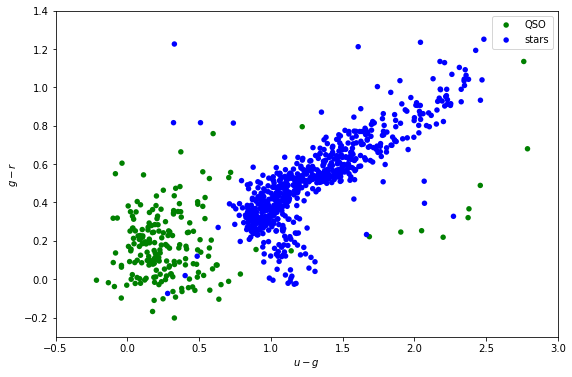

In [9]:
plt.figure(figsize=(9,6))
plt.scatter(X[y==0,0], X[y==0,1], c='g', s=30,
                 linewidths=0, edgecolors='none', label='QSO')
plt.scatter(X[y==1,0], X[y==1,1], c='b', s=30,
                 linewidths=0, edgecolors='none', label='stars')
plt.xlim(-0.5, 3.0)
plt.ylim(-0.3, 1.4)
plt.xlabel('$u - g$')
plt.ylabel('$g - r$')
plt.legend();

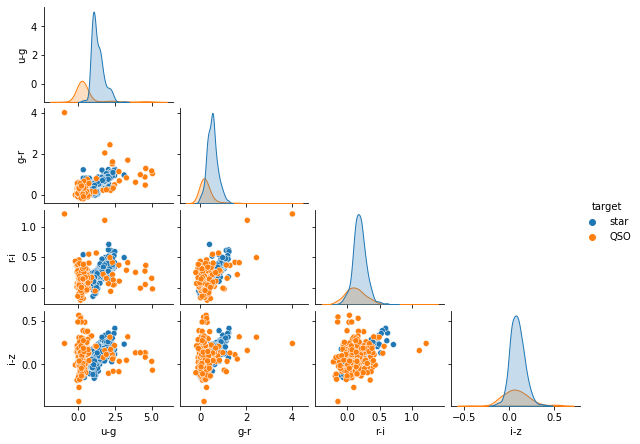

In [11]:
import seaborn as sns
g = sns.pairplot(data[['u-g','g-r','r-i','i-z','target']],hue='target')
g.fig.set_size_inches(9,6)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

In [12]:
# scale to have zero mean and unit standard deviation
X_scaled = StandardScaler().fit_transform(X)

In [13]:
# perform PCA to enhnace result
pca3 = PCA(n_components=2)
X_trans = pca3.fit_transform(X_scaled)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, random_state=42)
print(X_train.shape, X_test.shape)

(650, 2) (217, 2)


In [15]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [16]:
clf = SVC(C=0.1, kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [17]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [19]:
print ("%f"%(np.sum(y_test == y_pred) / float(len(y_test))))

0.944700


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9447004608294931

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

[[ 43   8]
 [  4 162]]


In [22]:
from sklearn.metrics import classification_report
print ( classification_report(y_pred, y_test) )

              precision    recall  f1-score   support

           0       0.84      0.91      0.88        47
           1       0.98      0.95      0.96       170

    accuracy                           0.94       217
   macro avg       0.91      0.93      0.92       217
weighted avg       0.95      0.94      0.95       217



([], [])

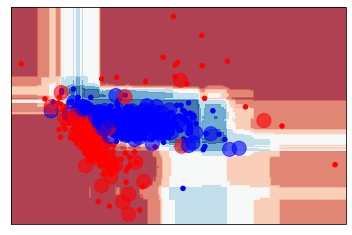

In [23]:
h = 0.02
cm = plt.cm.RdBu
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

x_min, x_max = X_trans[:, 0].min() - .5, X_trans[:, 0].max() + .5
y_min, y_max = X_trans[:, 1].min() - .5, X_trans[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, s=20)
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           alpha=0.6, s=200)

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

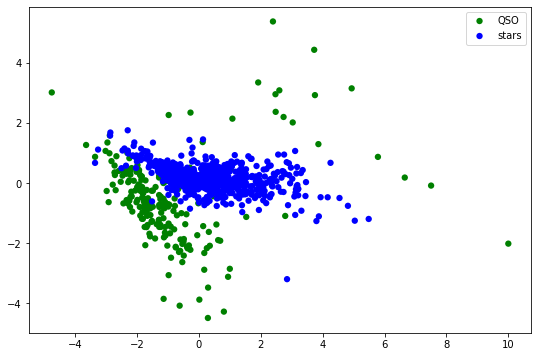

In [24]:
plt.figure(figsize=(9,6))
plt.scatter(X_trans[y==0,0], X_trans[y==0,1], c='g', s=40,
                 linewidths=0, edgecolors='none', label='QSO')
plt.scatter(X_trans[y==1,0], X_trans[y==1,1], c='b', s=40,
                 linewidths=0, edgecolors='none', label='stars')
plt.legend();